In this Notebook, we compare the performance of different models that we fine-tuned. It is mainly based on HuggingFace's [Evaluate](https://huggingface.co/docs/evaluate/index) library.



In [1]:
import os
%cd /content
!git clone --recursive https://github.com/BiteKirby3/FakeNewsChallenge
root_dir = "/content/FakeNewsChallenge/fnc-1-baseline"
os.chdir(root_dir)

/content
Cloning into 'FakeNewsChallenge'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 83 (delta 32), reused 63 (delta 15), pack-reused 0
Unpacking objects: 100% (83/83), 4.85 MiB | 3.92 MiB/s, done.


In [10]:
!pip install transformers datasets evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━

In [3]:
import pandas as pd

In [4]:
#read the generated csv
bert = pd.read_csv('/content/FakeNewsChallenge/result/BERT2023-04-26.csv')  
distillbert = pd.read_csv('/content/FakeNewsChallenge/result/DistilBERT2023-04-27.csv')  
roberta = pd.read_csv('/content/FakeNewsChallenge/result/RoBERTa2023-04-29.csv')  
xlnet = pd.read_csv('/content/FakeNewsChallenge/result/XLNet2023-05-01.csv')  

#Confusion Matrix

In [2]:
from utils.score import report_score

In [6]:
print("Confusion matrix for BERT:")
report_score(bert["ACTUAL_STANCE"], bert["PREDICT_STANCE"])

Confusion matrix for BERT:
-------------------------------------------------------------
|           |   agree   | disagree  |  discuss  | unrelated |
-------------------------------------------------------------
|   agree   |   1229    |    53     |    576    |    45     |
-------------------------------------------------------------
| disagree  |    156    |    270    |    218    |    53     |
-------------------------------------------------------------
|  discuss  |    325    |    76     |   3944    |    119    |
-------------------------------------------------------------
| unrelated |    14     |    14     |    185    |   18136   |
-------------------------------------------------------------
Score: 10328.0 out of 11651.25	(88.64284947966956%)


88.64284947966956

In [7]:
print("Confusion matrix for DistillBERT:")
report_score(distillbert["ACTUAL_STANCE"], distillbert["PREDICT_STANCE"])

Confusion matrix for DistillBERT:
-------------------------------------------------------------
|           |   agree   | disagree  |  discuss  | unrelated |
-------------------------------------------------------------
|   agree   |   1238    |    61     |    535    |    69     |
-------------------------------------------------------------
| disagree  |    353    |    55     |    225    |    64     |
-------------------------------------------------------------
|  discuss  |    630    |    89     |   3563    |    182    |
-------------------------------------------------------------
| unrelated |    78     |    32     |    292    |   17947   |
-------------------------------------------------------------
Score: 9816.0 out of 11651.25	(84.2484711940779%)


84.2484711940779

In [8]:
print("Confusion matrix for RoBERTa:")
report_score(roberta["ACTUAL_STANCE"], roberta["PREDICT_STANCE"])

Confusion matrix for RoBERTa:
-------------------------------------------------------------
|           |   agree   | disagree  |  discuss  | unrelated |
-------------------------------------------------------------
|   agree   |   1383    |    53     |    432    |    35     |
-------------------------------------------------------------
| disagree  |    198    |    335    |    144    |    20     |
-------------------------------------------------------------
|  discuss  |    337    |    105    |   3940    |    82     |
-------------------------------------------------------------
| unrelated |    11     |     7     |    90     |   18241   |
-------------------------------------------------------------
Score: 10535.5 out of 11651.25	(90.42377427314666%)


90.42377427314666

In [9]:
print("Confusion matrix for XLNet:")
report_score(xlnet["ACTUAL_STANCE"], xlnet["PREDICT_STANCE"])

Confusion matrix for XLNet:
-------------------------------------------------------------
|           |   agree   | disagree  |  discuss  | unrelated |
-------------------------------------------------------------
|   agree   |   1411    |    64     |    401    |    27     |
-------------------------------------------------------------
| disagree  |    207    |    302    |    144    |    44     |
-------------------------------------------------------------
|  discuss  |    503    |    145    |   3717    |    99     |
-------------------------------------------------------------
| unrelated |    68     |    27     |    184    |   18070   |
-------------------------------------------------------------
Score: 10313.5 out of 11651.25	(88.5183993133784%)


88.5183993133784

#Other metrics

##Metric description

In [12]:
import evaluate

In [18]:
precision = evaluate.load("precision")
print(precision.description)


Precision is the fraction of correctly labeled positive examples out of all of the examples that were labeled as positive. It is computed via the equation:
Precision = TP / (TP + FP)
where TP is the True positives (i.e. the examples correctly labeled as positive) and FP is the False positive examples (i.e. the examples incorrectly labeled as positive).



In [19]:
recall = evaluate.load("recall")
print(recall.description)


Recall is the fraction of the positive examples that were correctly labeled by the model as positive. It can be computed with the equation:
Recall = TP / (TP + FN)
Where TP is the true positives and FN is the false negatives.



In [20]:
f1 = evaluate.load("f1")
print(f1.description)


The F1 score is the harmonic mean of the precision and recall. It can be computed with the equation:
F1 = 2 * (precision * recall) / (precision + recall)



In [49]:
def compute_metric(df):
  #unrelated
  label2id = {"unrelated": 1, "discuss": 0, "agree": 0, "disagree": 0}
  df_unrelated = df.replace({"ACTUAL_STANCE": label2id})
  df_unrelated = df_unrelated.replace({"PREDICT_STANCE": label2id})
  f1_unrelated = f1.compute(references=df_unrelated["ACTUAL_STANCE"], predictions=df_unrelated["PREDICT_STANCE"])
  #discuss
  label2id = {"unrelated": 0, "discuss": 1, "agree": 0, "disagree": 0}
  df_discuss = df.replace({"ACTUAL_STANCE": label2id})
  df_discuss = df_discuss.replace({"PREDICT_STANCE": label2id})
  f1_discuss = f1.compute(references=df_discuss["ACTUAL_STANCE"], predictions=df_discuss["PREDICT_STANCE"])
  #agree
  label2id = {"unrelated": 0, "discuss": 0, "agree": 1, "disagree": 0}
  df_agree = df.replace({"ACTUAL_STANCE": label2id})
  df_agree = df_agree.replace({"PREDICT_STANCE": label2id})
  f1_agree = f1.compute(references=df_agree["ACTUAL_STANCE"], predictions=df_agree["PREDICT_STANCE"])
  #disagree
  label2id = {"unrelated": 0, "discuss": 0, "agree": 0, "disagree": 1}
  df_disagree = df.replace({"ACTUAL_STANCE": label2id})
  df_disagree = df_disagree.replace({"PREDICT_STANCE": label2id})
  f1_disagree = f1.compute(references=df_disagree["ACTUAL_STANCE"], predictions=df_disagree["PREDICT_STANCE"])

  #f1 macro
  f1_macro = (f1_unrelated['f1']+f1_discuss['f1']+f1_agree['f1']+f1_disagree['f1'])/4
  
  return {'f1_macro': f1_macro, 'f1_unrelated': f1_unrelated['f1'],'f1_discuss': f1_discuss['f1'],'f1_agree': f1_agree['f1'],'f1_disagree': f1_disagree['f1']}

##BERT

In [60]:
eval_bert = compute_metric(bert)
eval_bert['FNC_score'] = 0.8864284947966956
eval_bert

{'f1_macro': 0.7481941592492709,
 'f1_unrelated': 0.9882840172197701,
 'f1_discuss': 0.840311068498988,
 'f1_agree': 0.677695064791839,
 'f1_disagree': 0.48648648648648657,
 'FNC_score': 0.8864284947966956}

##DistillBert

In [61]:
eval_distillbert = compute_metric(distillbert)
eval_distillbert['FNC_score'] = 0.842484711940779
eval_distillbert

{'f1_macro': 0.6180800405962034,
 'f1_unrelated': 0.9804157220507498,
 'f1_discuss': 0.7848882035466462,
 'f1_agree': 0.5892432175154687,
 'f1_disagree': 0.1177730192719486,
 'FNC_score': 0.842484711940779}

##RoBERTa

In [62]:
eval_roberta = compute_metric(roberta)
eval_roberta['FNC_score'] = 0.9042377427314666
eval_roberta

{'f1_macro': 0.7859190858120435,
 'f1_unrelated': 0.9933291583848395,
 'f1_discuss': 0.8687982359426683,
 'f1_agree': 0.7218162839248434,
 'f1_disagree': 0.559732664995823,
 'FNC_score': 0.9042377427314666}

##XLNet

In [63]:
eval_xlnet = compute_metric(xlnet)
eval_xlnet['FNC_score'] = 0.885183993133784
eval_xlnet

{'f1_macro': 0.7501947828055202,
 'f1_unrelated': 0.9877285522971385,
 'f1_discuss': 0.8343434343434344,
 'f1_agree': 0.6896383186705768,
 'f1_disagree': 0.4890688259109312,
 'FNC_score': 0.885183993133784}

#Visualization

In [54]:
from evaluate.visualization import radar_plot

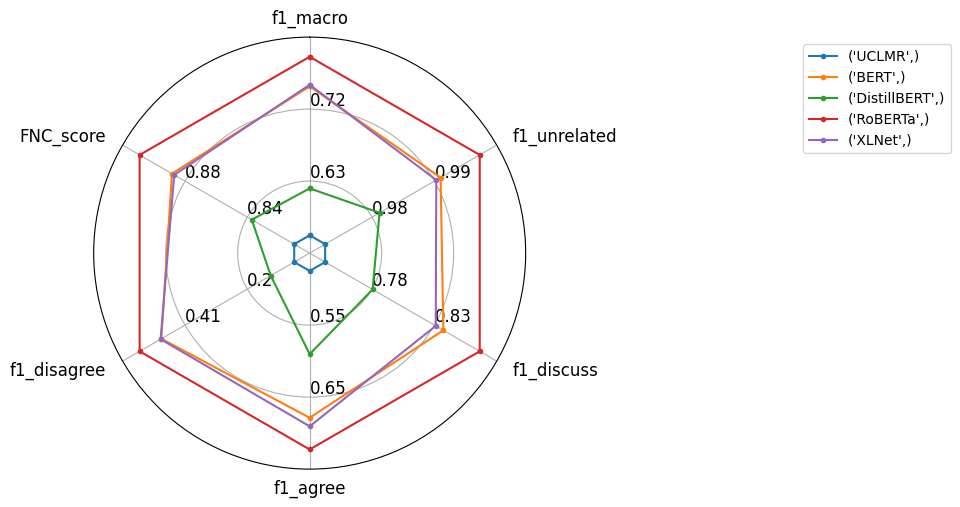

In [64]:
data = [
    #result of UCLMR
   {'f1_macro': 0.55832,
    'f1_unrelated': 0.97340,
    'f1_discuss': 0.74770,
    'f1_agree': 0.47355,
    'f1_disagree': 0.03862,
    'FNC_score': 0.8191},
   eval_bert,
   eval_distillbert,
   eval_roberta,
   eval_xlnet
   ]
model_names = ["UCLMR", "BERT", "DistillBERT", "RoBERTa", "XLNet"]
plot = radar_plot(data=data, model_names=model_names)
plot.show()